## Read me
#### How to use
1. Put all data which read from Data Collector App into file "data". **Totally 8 files: battery.csv, cpuFreq.csv, cpuTime.csv, gpu.csv, memory.csv, net.csv, temperature.csv, time.csv**. Data generation frequency: 1/s.
2. Put all heat map photos which read from front side IR camera into file "FLIROne_front". Photo generation frequency: 1/5s.
3. Put all heat map photos which read from back side IR camera into file "FLIROne_back". Photo generation frequency: 1/5s.
4. "Cell" -> "Run All"

***Data preprocessing takes time, especially in the case of abstracting specific data from numpy array of heat map. It take 0.5s at least to deal with one heat map. Just be patient :) I will try to optimise it later... By Xiaoyang***

#### Code structure
1. Data preprocessing (Done)
2. ML Model. I set a Linear Regression here as a "Hello World" model, feel free to replace whatever model you like : )

###### Author: Xiaoyang Zhang      @@@      Email: xzhan211@binghamton.edu

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Time csv

In [2]:
Time = pd.read_csv('data/time.csv', sep='\t', names=["time"])
Time.drop(Time.index[len(Time)-1], inplace = True)
Time['time'] = Time['time'].astype(int)

In [3]:
Time.head()

,time
0,143419
1,143420
2,143421
3,143423
4,143424


In [4]:
Time.tail()

,time
1126,145713
1127,145715
1128,145716
1129,145717
1130,145718


### Battery csv

In [5]:
Battery = pd.read_csv('data/battery.csv', sep=',', names=["bat_voltage", "bat_temp", "bat_capacity", "bat_current"])
Battery.drop(Battery.index[len(Battery)-1], inplace = True)
for x in list(Battery.columns.values):
    Battery[x] = Battery[x].astype(float)

In [6]:
Battery['bat_power'] = (Battery.bat_voltage / 1000) * (Battery.bat_current / 1000) * 1000

In [7]:
Battery.head()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
0,4335.0,27.0,100.0,625.0,2709.375
1,4347.0,27.0,100.0,243.0,1056.321
2,4355.0,27.0,100.0,167.0,727.285
3,4355.0,27.0,100.0,178.0,775.190
4,4295.0,27.0,100.0,1021.0,4385.195


In [8]:
Battery.tail()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
1126,4072.0,47.0,85.0,1274.0,5187.728
1127,4079.0,47.0,85.0,1263.0,5151.777
1128,4104.0,47.0,85.0,707.0,2901.528
1129,4111.0,47.0,85.0,604.0,2483.044
1130,4125.0,47.0,85.0,386.0,1592.250


### GPU csv

In [9]:
GPU = pd.read_csv('data/gpu.csv', sep=',', names=["gpu_usage", "gpu_temp", "gpu_freq"])
GPU.drop(GPU.index[len(GPU)-1], inplace = True)
for x in list(GPU.columns.values):
    GPU[x] = GPU[x].astype(float)

In [10]:
GPU.head()

,gpu_usage,gpu_temp,gpu_freq
0,16.0,33.9,257000000.0
1,10.0,33.6,257000000.0
2,10.0,33.2,257000000.0
3,10.0,33.2,257000000.0
4,24.0,34.3,257000000.0


In [11]:
GPU.tail()

,gpu_usage,gpu_temp,gpu_freq
1126,71.0,68.3,257000000.0
1127,76.0,67.2,257000000.0
1128,76.0,65.2,257000000.0
1129,14.0,64.1,257000000.0
1130,19.0,63.3,257000000.0


### Net csv (KB/s)

In [12]:
Net = pd.read_csv('data/net.csv', sep=',', names=["tx", "rx"])
Net.drop(Net.index[len(Net)-1], inplace = True)
for x in list(Net.columns.values):
    Net[x] = Net[x].astype(float)

In [13]:
Net.head()

,tx,rx
0,35506.960,5586214.500
1,0.000,0.000
2,0.000,0.000
3,0.078,0.072
4,0.193,0.064


In [14]:
Net.tail()

,tx,rx
1126,3.918,1.624
1127,8.186,2.930
1128,8.022,68.635
1129,11.588,18.454
1130,9.748,54.150


### CPU frequency csv (kHz)

In [15]:
size = len(pd.read_csv('data/cpuFreq.csv').columns);

In [16]:
titles = []
for i in range(0, size):
    titles.append('f_cpu' + str(i))

CPUFreq = pd.read_csv('data/cpuFreq.csv', sep=',', names=titles)
CPUFreq.drop(CPUFreq.index[len(CPUFreq)-1], inplace = True)
for x in list(CPUFreq.columns.values):
    CPUFreq[x] = CPUFreq[x].astype(float)

In [17]:
CPUFreq.head()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
0,1555200.0,1555200.0,1555200.0,1555200.0,1708800.0,1708800.0,1708800.0,1612800.0
1,1785600.0,1785600.0,1785600.0,1785600.0,1286400.0,1286400.0,1286400.0,1804800.0
2,1632000.0,1632000.0,1632000.0,1632000.0,1286400.0,1286400.0,1286400.0,1286400.0
3,1478400.0,1478400.0,1478400.0,1478400.0,710400.0,710400.0,710400.0,825600.0
4,1785600.0,1785600.0,1785600.0,1785600.0,2419200.0,2419200.0,2419200.0,2841600.0


In [18]:
CPUFreq.tail()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
1126,1785600.0,1785600.0,1785600.0,1785600.0,2016000.0,2016000.0,2016000.0,2016000.0
1127,1785600.0,1785600.0,1785600.0,1785600.0,2016000.0,2016000.0,2016000.0,2016000.0
1128,1785600.0,1785600.0,1785600.0,1785600.0,2419200.0,2419200.0,2419200.0,2841600.0
1129,1785600.0,1785600.0,1785600.0,1785600.0,1056000.0,1056000.0,1056000.0,825600.0
1130,1785600.0,1785600.0,1785600.0,1785600.0,710400.0,710400.0,710400.0,825600.0


### CPU time csv

In [19]:
colSize = len(pd.read_csv('data/cpuTime.csv').columns);
titles = []
for i in range(0, colSize):
    if i == 0:
        titles.append('cpu')
    else:
        titles.append('cpu' + str(i-1))
#titles

In [20]:
CPUTime = pd.read_csv('data/cpuTime.csv', sep=',', names=titles)
CPUTime.drop(CPUTime.index[len(CPUTime)-1], inplace = True)

In [21]:
CPUTime.head()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
0,848005 110797 678211 13736527 13487 94925 480...,107326 25969 137295 1616593 2304 28389 10052 ...,110769 26608 135275 1618738 2257 16913 17507 ...,98945 12460 133703 1656687 2292 15087 9641 0 0 0,96780 12399 134377 1649484 2170 25556 7414 0 0 0,107347 7563 34731 1800518 636 2130 832 0 0 0,112360 10204 41451 1786044 657 2400 858 0 0 0,111193 10684 40925 1787466 709 2357 846 0 0 0,103281 4906 20450 1820993 2458 2090 945 0 0 0
1,848102 110836 678316 13737141 13487 94933 481...,107341 25981 137320 1616646 2304 28394 10052 ...,110781 26630 135291 1618793 2257 16914 17508 ...,98964 12460 133732 1656745 2292 15089 9642 0 0 0,96801 12400 134395 1649550 2170 25557 7414 0 0 0,107356 7564 34735 1800610 636 2130 832 0 0 0,112371 10205 41459 1786135 657 2400 858 0 0 0,111202 10685 40929 1787561 709 2357 846 0 0 0,103282 4906 20452 1821099 2458 2090 945 0 0 0
2,848140 110837 678356 13737986 13487 94938 481...,107346 25981 137328 1616746 2304 28396 10052 ...,110787 26630 135298 1618895 2257 16914 17508 ...,98978 12460 133742 1656836 2292 15089 9642 0 0 0,96805 12401 134403 1649650 2170 25558 7414 0 0 0,107361 7564 34737 1800720 636 2130 832 0 0 0,112374 10205 41463 1786246 657 2400 858 0 0 0,111204 10685 40930 1787674 709 2357 846 0 0 0,103282 4906 20452 1821215 2458 2090 945 0 0 0
3,848206 110838 678406 13738798 13487 94944 481...,107361 25981 137342 1616829 2305 28399 10053 ...,110797 26630 135308 1618990 2257 16915 17509 ...,98991 12460 133750 1656928 2292 15090 9643 0 0 0,96813 12401 134411 1649748 2170 25559 7415 0 0 0,107374 7564 34743 1800819 636 2130 832 0 0 0,112375 10205 41463 1786362 657 2400 858 0 0 0,111209 10685 40932 1787784 709 2357 847 0 0 0,103282 4906 20453 1821333 2458 2090 946 0 0 0
4,848256 110839 678445 13739637 13491 94948 481...,107376 25982 137351 1616921 2305 28400 10053 ...,110804 26630 135319 1619088 2257 16916 17510 ...,98996 12461 133755 1657033 2292 15091 9644 0 0 0,96817 12401 134416 1649852 2170 25560 7416 0 0 0,107378 7564 34744 1800932 636 2130 832 0 0 0,112381 10205 41466 1786472 657 2401 858 0 0 0,111213 10685 40935 1787896 710 2357 847 0 0 0,103288 4906 20456 1821440 2461 2090 946 0 0 0


In [22]:
CPUTime.tail()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
1126,1341836 120230 834678 14108558 13656 126198 5...,145603 28257 159711 1679201 2323 34627 10607 ...,145529 29001 158296 1680384 2276 22990 21466 ...,136691 14676 155920 1719000 2305 22019 10768 ...,121878 14049 160963 1718481 2177 32049 7900 0...,195292 7579 51413 1830340 662 3466 1365 0 0 0,198953 10638 58548 1816190 684 3765 1361 0 0 0,197798 11109 57995 1817823 738 3720 1347 0 0 0,200089 4917 31829 1847135 2487 3558 1458 0 0 0
1127,1342398 120308 834962 14108688 13659 126242 5...,145678 28262 159745 1679213 2323 34637 10608 ...,145598 29008 158333 1680398 2276 22998 21470 ...,136746 14686 155960 1719021 2305 22030 10769 ...,121922 14076 160996 1718503 2177 32056 7900 0...,195365 7586 51448 1830361 662 3467 1366 0 0 0,199043 10644 58580 1816200 684 3767 1362 0 0 0,197870 11124 58033 1817839 738 3722 1347 0 0 0,200172 4918 31865 1847149 2488 3560 1460 0 0 0
1128,1342669 120328 835130 14109132 13660 126269 5...,145746 28268 159774 1679224 2323 34643 10610 ...,145683 29009 158347 1680411 2276 23004 21474 ...,136763 14689 155982 1719083 2306 22036 10771 ...,121935 14079 161027 1718563 2177 32064 7901 0...,195389 7586 51468 1830433 663 3468 1366 0 0 0,199068 10648 58597 1816271 684 3768 1362 0 0 0,197891 11128 58054 1817907 738 3723 1347 0 0 0,200191 4918 31876 1847236 2489 3560 1460 0 0 0
1129,1342872 120341 835340 14109662 13660 126286 5...,145799 28271 159800 1679257 2323 34648 10611 ...,145747 29011 158373 1680432 2276 23010 21476 ...,136779 14691 156038 1719129 2306 22039 10772 ...,121955 14082 161062 1718621 2177 32066 7901 0...,195401 7586 51486 1830527 663 3468 1367 0 0 0,199085 10648 58614 1816361 684 3768 1362 0 0 0,197905 11129 58073 1817995 738 3723 1348 0 0 0,200198 4919 31891 1847336 2489 3561 1460 0 0 0
1130,1343164 120394 835529 14110150 13661 126302 5...,145902 28283 159813 1679257 2323 34654 10611 ...,145828 29012 158416 1680432 2276 23013 21481 ...,136796 14705 156088 1719174 2306 22041 10774 ...,121979 14087 161089 1718690 2177 32068 7902 0...,195420 7589 51499 1830623 663 3469 1367 0 0 0,199105 10654 58629 1816448 685 3769 1362 0 0 0,197921 11136 58089 1818087 739 3724 1348 0 0 0,200211 4924 31902 1847437 2489 3561 1460 0 0 0


In [23]:
rowSize = len(CPUTime.index)
seven = 7

In [24]:
threeD = []
for c in range(0, colSize):
    twoD = []
    for r in range(0, rowSize):
        line = CPUTime.iloc[r][c]
        arr = line.split()
        oneD = []
        for i in range(0, seven):
            oneD.append(int(arr[i]))
        twoD.append(oneD)
    threeD.append(twoD) 

In [25]:
threeD[0]

[[848005, 110797, 678211, 13736527, 13487, 94925, 48099],
 [848102, 110836, 678316, 13737141, 13487, 94933, 48102],
 [848140, 110837, 678356, 13737986, 13487, 94938, 48104],
 [848206, 110838, 678406, 13738798, 13487, 94944, 48105],
 [848256, 110839, 678445, 13739637, 13491, 94948, 48109],
 [848407, 110849, 678562, 13740226, 13495, 94956, 48113],
 [848517, 110854, 678585, 13740943, 13497, 94960, 48116],
 [849005, 110860, 678695, 13741173, 13535, 94975, 48123],
 [849245, 110871, 678716, 13741805, 13540, 94981, 48126],
 [849416, 110896, 678782, 13742444, 13542, 94988, 48127],
 [849537, 110904, 678862, 13743148, 13548, 94996, 48130],
 [849724, 110936, 678973, 13743707, 13564, 95008, 48135],
 [849866, 110951, 679012, 13744328, 13575, 95015, 48139],
 [850048, 110960, 679070, 13744952, 13576, 95025, 48142],
 [850282, 110973, 679170, 13745475, 13577, 95035, 48145],
 [850459, 110979, 679234, 13746108, 13577, 95044, 48149],
 [850626, 110986, 679322, 13746708, 13578, 95054, 48153],
 [850801, 1109

In [26]:
for i in range(0, colSize):
    for j in range(rowSize-1, 0, -1):
        for k in range(0, seven):
            threeD[i][j][k] = threeD[i][j][k] - threeD[i][j-1][k]

In [27]:
threeD[0]

[[848005, 110797, 678211, 13736527, 13487, 94925, 48099],
 [97, 39, 105, 614, 0, 8, 3],
 [38, 1, 40, 845, 0, 5, 2],
 [66, 1, 50, 812, 0, 6, 1],
 [50, 1, 39, 839, 4, 4, 4],
 [151, 10, 117, 589, 4, 8, 4],
 [110, 5, 23, 717, 2, 4, 3],
 [488, 6, 110, 230, 38, 15, 7],
 [240, 11, 21, 632, 5, 6, 3],
 [171, 25, 66, 639, 2, 7, 1],
 [121, 8, 80, 704, 6, 8, 3],
 [187, 32, 111, 559, 16, 12, 5],
 [142, 15, 39, 621, 11, 7, 4],
 [182, 9, 58, 624, 1, 10, 3],
 [234, 13, 100, 523, 1, 10, 3],
 [177, 6, 64, 633, 0, 9, 4],
 [167, 7, 88, 600, 1, 10, 4],
 [175, 6, 69, 627, 1, 9, 5],
 [181, 7, 72, 622, 0, 10, 4],
 [296, 14, 90, 455, 3, 9, 9],
 [122, 5, 54, 705, 0, 9, 4],
 [90, 7, 40, 760, 0, 7, 2],
 [113, 5, 41, 741, 0, 8, 4],
 [128, 16, 65, 672, 1, 8, 4],
 [247, 26, 188, 425, 7, 17, 6],
 [302, 7, 185, 393, 0, 21, 5],
 [305, 7, 127, 424, 0, 19, 6],
 [319, 4, 130, 430, 0, 20, 6],
 [306, 7, 139, 425, 0, 20, 6],
 [286, 3, 129, 434, 0, 19, 5],
 [289, 4, 131, 427, 1, 20, 5],
 [311, 5, 131, 422, 0, 20, 4],
 [304, 5

#### user  nice  system  idle  iowait  irq  softirq

In [28]:
final3D = []
for i in range(0, colSize):
    twoD = pd.DataFrame(columns='total user% nice% system% idle% iowait% irq% softirq%'.split())
    index = 0
    for j in range(0, rowSize):
        line = threeD[i][j]
        total = sum(line)
        oneD = []
        oneD.append(total)
        for k in range(0, seven):
            oneD.append(round(threeD[i][j][k]*100 / total))
        twoD.loc[index] = oneD
        index += 1
    final3D.append(twoD)

In [29]:
final3D[0].head()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
0,15530051,5,1,4,88,0,1,0
1,866,11,5,12,71,0,1,0
2,931,4,0,4,91,0,1,0
3,936,7,0,5,87,0,1,0
4,941,5,0,4,89,0,0,0


In [30]:
final3D[0].tail()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
1126,963,45,1,16,34,0,3,1
1127,1113,50,7,26,12,0,4,1
1128,939,29,2,18,47,0,3,1
1129,978,21,1,21,54,0,2,1
1130,1048,28,5,18,47,0,2,1


### Memory csv (kB)

In [31]:
Memory = pd.read_csv('data/memory.csv')

In [32]:
colSize = len(Memory.columns)
titles = []
for i in range(0, colSize):
    titles.append(Memory.iloc[0][i].split(':')[0])

In [33]:
Memory = pd.read_csv('data/memory.csv', sep=',', names=titles)
rowSize = len(Memory)
for i in range(0, rowSize):
    for j in range(0, colSize):
        Memory.iloc[i][j] = Memory.iloc[i][j].split(':')[1].strip().split()[0]

In [34]:
for x in list(Memory.columns.values):
    Memory[x] = Memory[x].astype(float)

In [35]:
Memory.head()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
0,15.0,5598060.0,111516.0,2690172.0,6424.0,2808632.0,97088.0,1795956.0,1712256.0,429904.0,...,490964.0,336004.0,0.0,4896176.0,93295224.0,263061440.0,110824.0,0.0,233472.0,6576.0
1,15.0,5598060.0,109060.0,2687740.0,6424.0,2808704.0,97068.0,1796852.0,1718660.0,431768.0,...,490196.0,330420.0,0.0,4896176.0,93283812.0,263061440.0,110792.0,0.0,233472.0,2464.0
2,15.0,5598060.0,102504.0,2681256.0,6424.0,2808668.0,98724.0,1802392.0,1720684.0,437424.0,...,490196.0,330448.0,0.0,4896176.0,93297736.0,263061440.0,110836.0,0.0,233472.0,2544.0
3,15.0,5598060.0,104308.0,2683076.0,6424.0,2808772.0,99392.0,1794960.0,1722712.0,430144.0,...,490196.0,330448.0,0.0,4896176.0,93300508.0,263061440.0,110804.0,0.0,233472.0,6624.0
4,15.0,5598060.0,74420.0,2671288.0,6424.0,2826896.0,99904.0,1804432.0,1741844.0,439276.0,...,490196.0,320728.0,0.0,4896176.0,94028564.0,263061440.0,111384.0,0.0,233472.0,156.0


In [36]:
Memory.tail()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
1126,14.0,5598060.0,154920.0,1463780.0,4388.0,1548364.0,89624.0,2177160.0,801848.0,1210896.0,...,934148.0,58844.0,0.0,4896176.0,74717644.0,263061440.0,107096.0,0.0,233472.0,1704.0
1127,14.0,5598060.0,104864.0,1435476.0,4388.0,1570196.0,92832.0,2174744.0,815984.0,1194204.0,...,973136.0,50772.0,0.0,4896176.0,74644344.0,263061440.0,107492.0,0.0,233472.0,368.0
1128,14.0,5598060.0,156044.0,1486620.0,4388.0,1569404.0,92848.0,2128020.0,815328.0,1148220.0,...,984172.0,740112.0,0.0,4896176.0,74644344.0,263061440.0,106740.0,0.0,233472.0,2712.0
1129,14.0,5598060.0,213248.0,1543392.0,4388.0,1567916.0,93656.0,1968832.0,906800.0,1076936.0,...,994088.0,824832.0,0.0,4896176.0,74644344.0,263061440.0,106348.0,0.0,233472.0,4560.0
1130,14.0,5598060.0,206948.0,1539528.0,4392.0,1570240.0,94720.0,1955288.0,919068.0,1062384.0,...,1000232.0,785272.0,0.0,4896176.0,74641660.0,263061440.0,106556.0,0.0,233472.0,6616.0


### Temperature csv

In [37]:
temp = pd.read_csv('data/temperature.csv')
colSize = len(temp.columns)
rowSize = len(temp)

In [38]:
titles = []
for i in range(0, colSize):
    titles.append(temp.iloc[rowSize-1][i])
len(titles)

88

In [39]:
Temperature = pd.read_csv('data/temperature.csv', sep=',', names=titles)
Temperature.drop(Temperature.index[len(Temperature)-1], inplace = True)
for x in list(Temperature.columns.values):
    Temperature[x] = Temperature[x].astype(float)

In [40]:
Temperature.head()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
0,33600.0,37400.0,37400.0,36600.0,35900.0,38200.0,37800.0,37400.0,36600.0,35500.0,...,29134.0,28429.0,28432.0,16.0,0.0,27700.0,27000.0,30534.0,28400.0,27700.0
1,33900.0,36300.0,36600.0,37400.0,36300.0,37000.0,36300.0,33900.0,35500.0,35100.0,...,29173.0,28453.0,28453.0,16.0,0.0,27700.0,27000.0,30534.0,28400.0,27700.0
2,33200.0,35500.0,35100.0,35500.0,35100.0,35500.0,35100.0,33200.0,34300.0,33900.0,...,29194.0,28485.0,28494.0,16.0,0.0,27700.0,27000.0,31701.0,28400.0,27700.0
3,33200.0,35500.0,35100.0,33900.0,33900.0,35100.0,34300.0,32800.0,33600.0,33600.0,...,29223.0,28497.0,28509.0,16.0,0.0,27700.0,27000.0,31701.0,28500.0,27700.0
4,34700.0,38600.0,39000.0,39000.0,39000.0,42000.0,40900.0,37800.0,39700.0,40100.0,...,29250.0,28539.0,28539.0,16.0,0.0,27700.0,27000.0,31701.0,28500.0,27700.0


In [41]:
Temperature.tail()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
1126,69500.0,73300.0,73300.0,72200.0,71800.0,73700.0,72900.0,71000.0,72600.0,72600.0,...,45458.0,44048.0,44052.0,16.0,0.0,47100.0,44000.0,56208.0,44000.0,47100.0
1127,68300.0,72900.0,72900.0,71800.0,71800.0,73300.0,72900.0,70200.0,72600.0,72600.0,...,45454.0,44056.0,44056.0,16.0,0.0,47100.0,44000.0,56208.0,44000.0,47100.0
1128,66400.0,69500.0,69500.0,68300.0,68700.0,69500.0,68700.0,67200.0,68700.0,68700.0,...,45429.0,44060.0,44056.0,16.0,0.0,47100.0,44000.0,56208.0,44000.0,47100.0
1129,64500.0,67900.0,67200.0,66400.0,66400.0,66800.0,66400.0,65600.0,65600.0,65200.0,...,45408.0,44037.0,44048.0,16.0,0.0,47100.0,44000.0,56208.0,44000.0,47100.0
1130,63700.0,66000.0,66000.0,64800.0,65600.0,65600.0,65200.0,62900.0,64100.0,64500.0,...,45387.0,43958.0,43965.0,16.0,0.0,47000.0,44000.0,56208.0,43900.0,47000.0


### Combine tables to final data set

In [42]:
#memory
print(Memory.columns)
selectedMemCol = ['Thread quantity', 'MemFree', 'MemAvailable']
PartMemory = Memory[selectedMemCol]

Index(['Thread quantity', 'MemTotal', 'MemFree', 'MemAvailable', 'Buffers',
       'Cached', 'SwapCached', 'Active', 'Inactive', 'Active(anon)',
       'Inactive(anon)', 'Active(file)', 'Inactive(file)', 'Unevictable',
       'Mlocked', 'SwapTotal', 'SwapFree', 'Dirty', 'Writeback', 'AnonPages',
       'Mapped', 'Shmem', 'Slab', 'SReclaimable', 'SUnreclaim', 'KernelStack',
       'ShadowCallStack', 'PageTables', 'NFS_Unstable', 'Bounce', 'ION_heap',
       'ION_heap_pool', 'WritebackTmp', 'CommitLimit', 'Committed_AS',
       'VmallocTotal', 'VmallocUsed', 'VmallocChunk', 'CmaTotal', 'CmaFree'],
      dtype='object')


In [43]:
#temperature
#print(Temperature.columns)
selectedTempCol = ['cpu-1-0-usr', 'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr', 'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr', 'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm']
PartTemp = Temperature[selectedTempCol]

In [44]:
#time
idleTitle = []
cpuQuantity = len(final3D)
for i in range(0, cpuQuantity):
    if i==0:
        idleTitle.append("cpuIdle")
    else:
        idleTitle.append("cpuIdle" + str(i-1))

PartTime = pd.DataFrame(columns=idleTitle)
for r in range(0, rowSize):
    oneLine = []
    for n in range(0, cpuQuantity):
        oneLine.append(final3D[n]["idle%"][r])
    PartTime.loc[r] = oneLine

In [45]:
for x in list(PartTime.columns.values):
    PartTime[x] = PartTime[x].astype(float)
PartTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 0 to 1130
Data columns (total 9 columns):
cpuIdle     1131 non-null float64
cpuIdle0    1131 non-null float64
cpuIdle1    1131 non-null float64
cpuIdle2    1131 non-null float64
cpuIdle3    1131 non-null float64
cpuIdle4    1131 non-null float64
cpuIdle5    1131 non-null float64
cpuIdle6    1131 non-null float64
cpuIdle7    1131 non-null float64
dtypes: float64(9)
memory usage: 88.4 KB


In [46]:
PartTime.head()

,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,88.0,84.0,84.0,86.0,86.0,92.0,91.0,91.0,93.0
1,71.0,48.0,51.0,53.0,62.0,87.0,82.0,87.0,97.0
2,91.0,87.0,89.0,79.0,88.0,94.0,94.0,97.0,100.0
3,87.0,71.0,81.0,80.0,84.0,84.0,99.0,93.0,98.0
4,89.0,78.0,83.0,89.0,90.0,96.0,92.0,93.0,90.0


In [47]:
#combine all dataframe
LeftSet = pd.concat([Time, Battery, GPU, Net, CPUFreq, PartMemory, PartTemp, PartTime], axis=1)
#LeftSet = pd.concat([Time, Battery, GPU], axis=1)
LeftSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,xo-therm,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,143419,4335.0,27.0,100.0,625.0,2709.375,16.0,33.9,257000000.0,35506.960,...,31069.0,88.0,84.0,84.0,86.0,86.0,92.0,91.0,91.0,93.0
1,143420,4347.0,27.0,100.0,243.0,1056.321,10.0,33.6,257000000.0,0.000,...,31091.0,71.0,48.0,51.0,53.0,62.0,87.0,82.0,87.0,97.0
2,143421,4355.0,27.0,100.0,167.0,727.285,10.0,33.2,257000000.0,0.000,...,31123.0,91.0,87.0,89.0,79.0,88.0,94.0,94.0,97.0,100.0
3,143423,4355.0,27.0,100.0,178.0,775.190,10.0,33.2,257000000.0,0.078,...,31148.0,87.0,71.0,81.0,80.0,84.0,84.0,99.0,93.0,98.0
4,143424,4295.0,27.0,100.0,1021.0,4385.195,24.0,34.3,257000000.0,0.193,...,31161.0,89.0,78.0,83.0,89.0,90.0,96.0,92.0,93.0,90.0


In [48]:
len(LeftSet)

1131

In [49]:
LeftSet.columns

Index(['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'bat_power', 'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0',
       'f_cpu1', 'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7'],
      dtype='object')

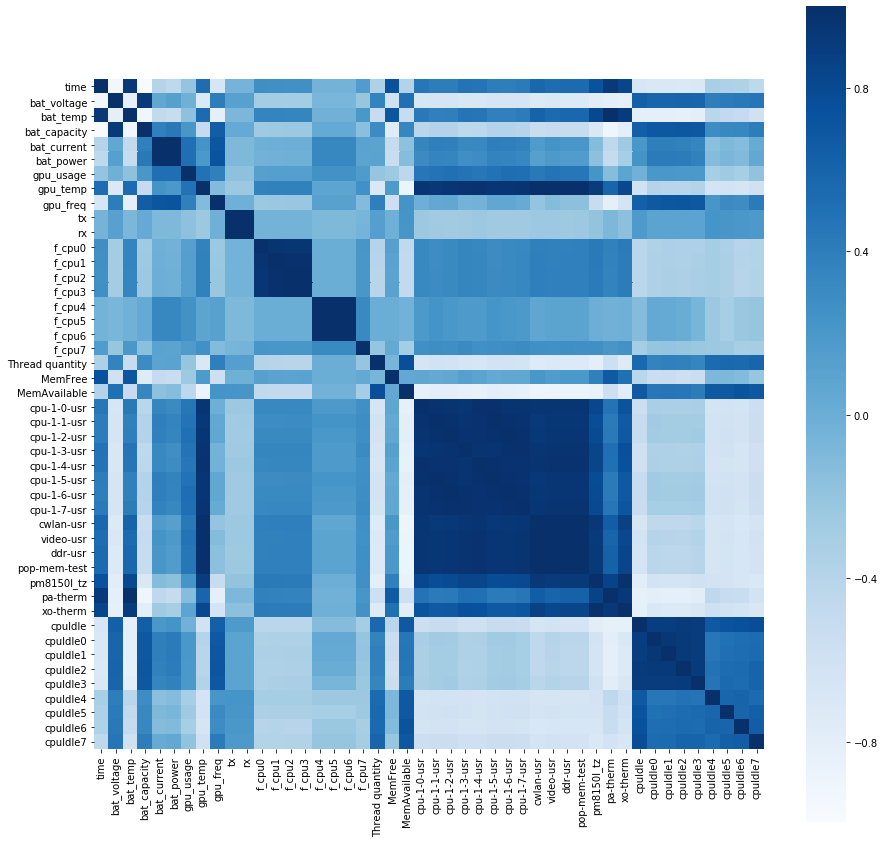

In [50]:
plt.subplots(figsize=(15, 15))
sns.heatmap(LeftSet.corr(), vmax=1, square=True, cmap="Blues")
#plt.savefig('./BluesStateRelation.png')
plt.show()

### Description about DataSet
DataSet is the final data pool.

DataSet = LeftSet + RightSet

LeftSet is the statistic data which collected from Data Collector App.

RightSet is the temperature data which abstracted from heat map photos.

**There are already plenty of important features in the pool:**

1. time: format is hhmmss
2. battery: current voltage, current, temperature, capacity
3. GPU: usage, temp, frequency
4. network: tx (upload speed), rx (download speed)
5. CPU Frequency: CPU0 ~ CPU7
6. thread quantity
7. memory: free size, available size
8. CPU Temperature: CPU0 ~ CPU7 (cpu-1-x-usr)
9. WIFI IC Temperature (cwlan-usr)
10. temperature relates to video (video-user, I don't know which hardware generates this temperature)
11. temperature relates to DDR of memory (DDR-usr)
12. temperature relates to memory (pop-mem-test)
13. temperature relates to power manager IC (pm8150l_tz)
14. temperature relates to power amplifier (pa-therm)
15. CPU idle percentage (cpuIdle, cpuidle0 ~ 7)
16. ground truth, surface temperature from smartphone (heatest_temp)

### Above part is data preprocessing

# =======================================================

### Below part is the ML model
#### How to use:
Step1: Grab features you need from DataSet to get the "X" and "y" set. "y" is the groud true set.

Step2: Pick the ML model you like, have fun : )





### X and y arrays

In [51]:
LeftSet.drop(LeftSet.index[:3], inplace=True)

In [52]:
X = LeftSet[['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current', 'bat_power',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7']]
#y = DataSet['heatest_temp']

<Figure size 2160x720 with 0 Axes>

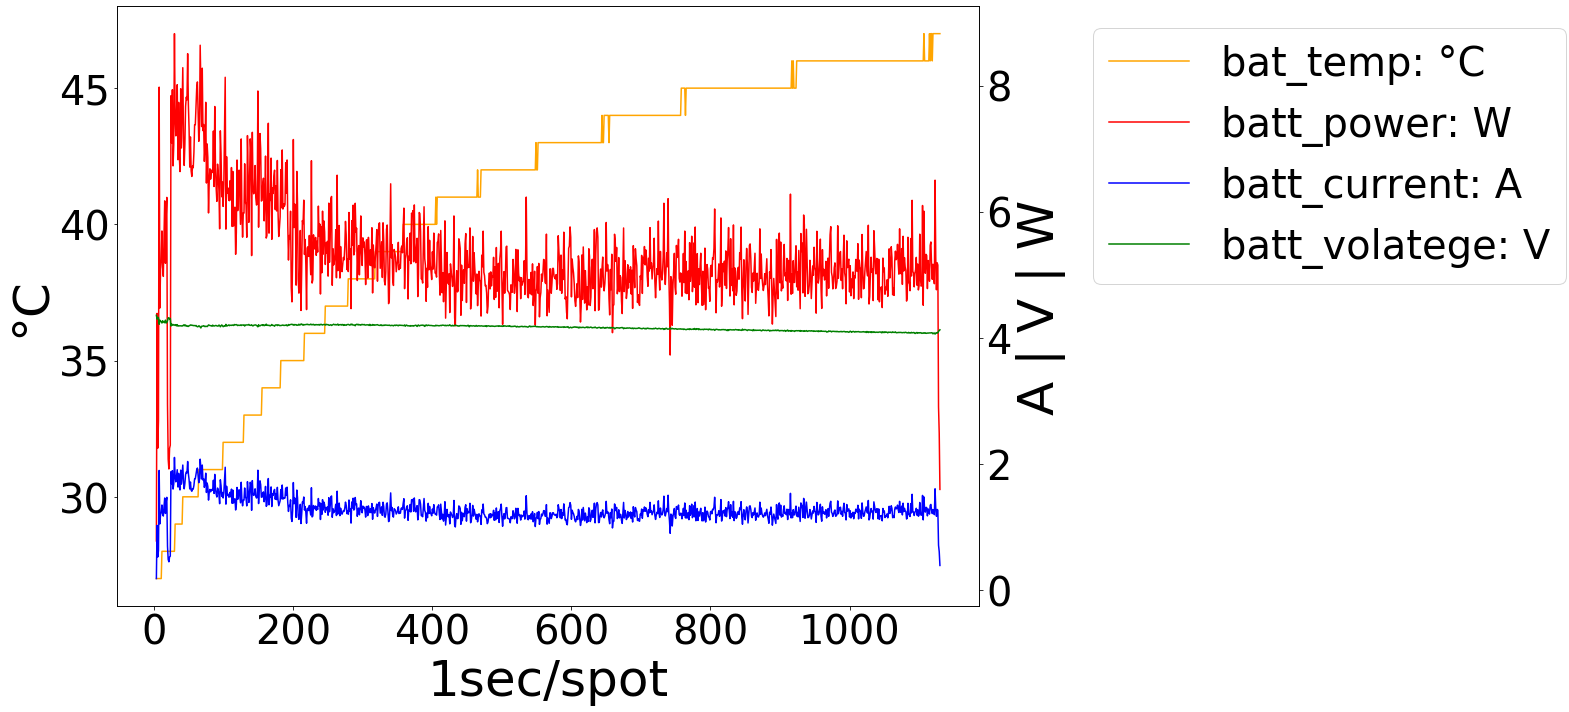

In [63]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(X['bat_temp'], color='orange', label = 'bat_temp: °C')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('A | V | W', fontsize=50)
ax2.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax2.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
ax2.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Battery Power VS Battery Temperature', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

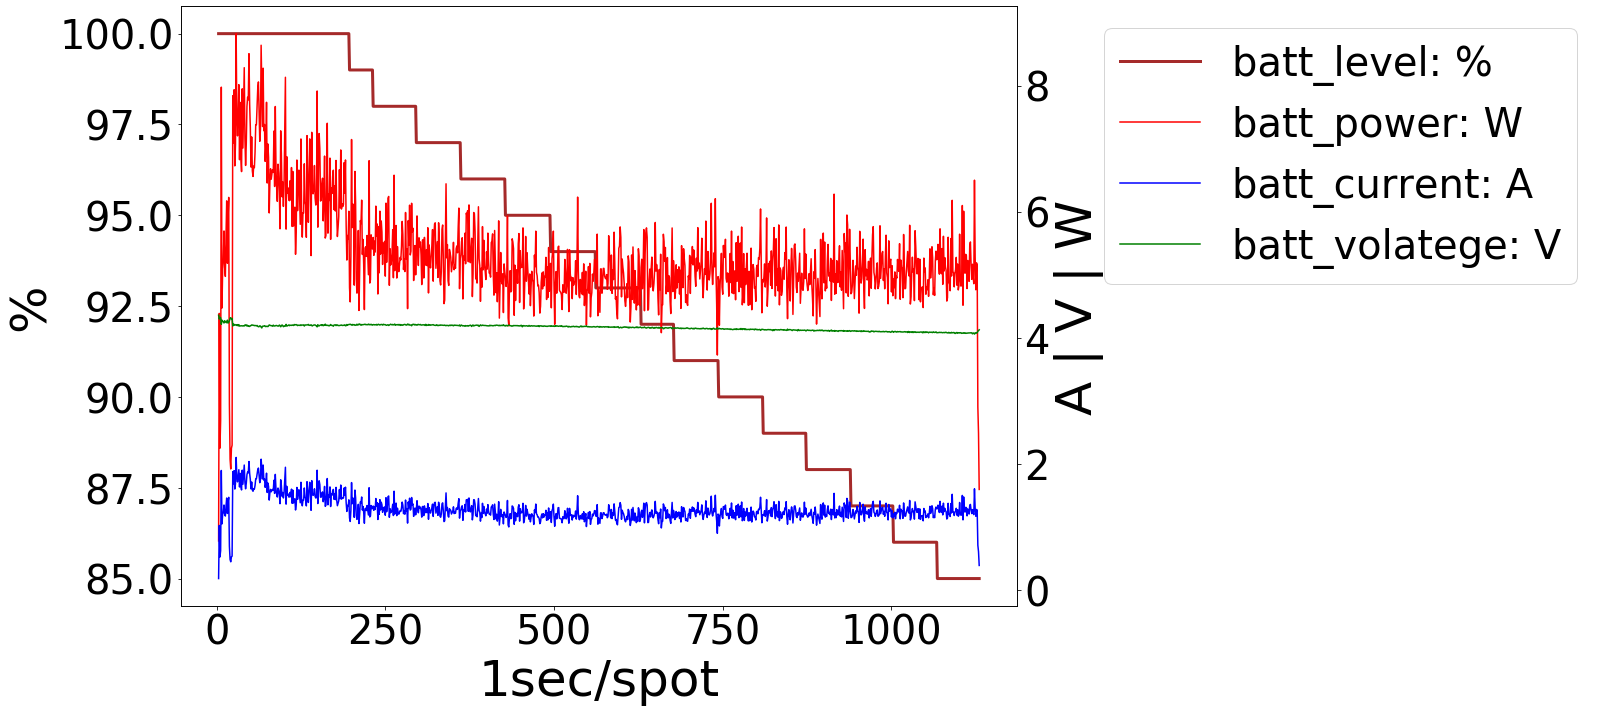

In [66]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('%', fontsize=50)

ax1.plot(X['bat_capacity'], color='brown', label = 'batt_level: %', linewidth=3)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('A | V | W', fontsize=50)
ax2.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax2.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
ax2.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')

fig.legend(bbox_to_anchor=(1.46,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Battery Power VS Battery Level', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

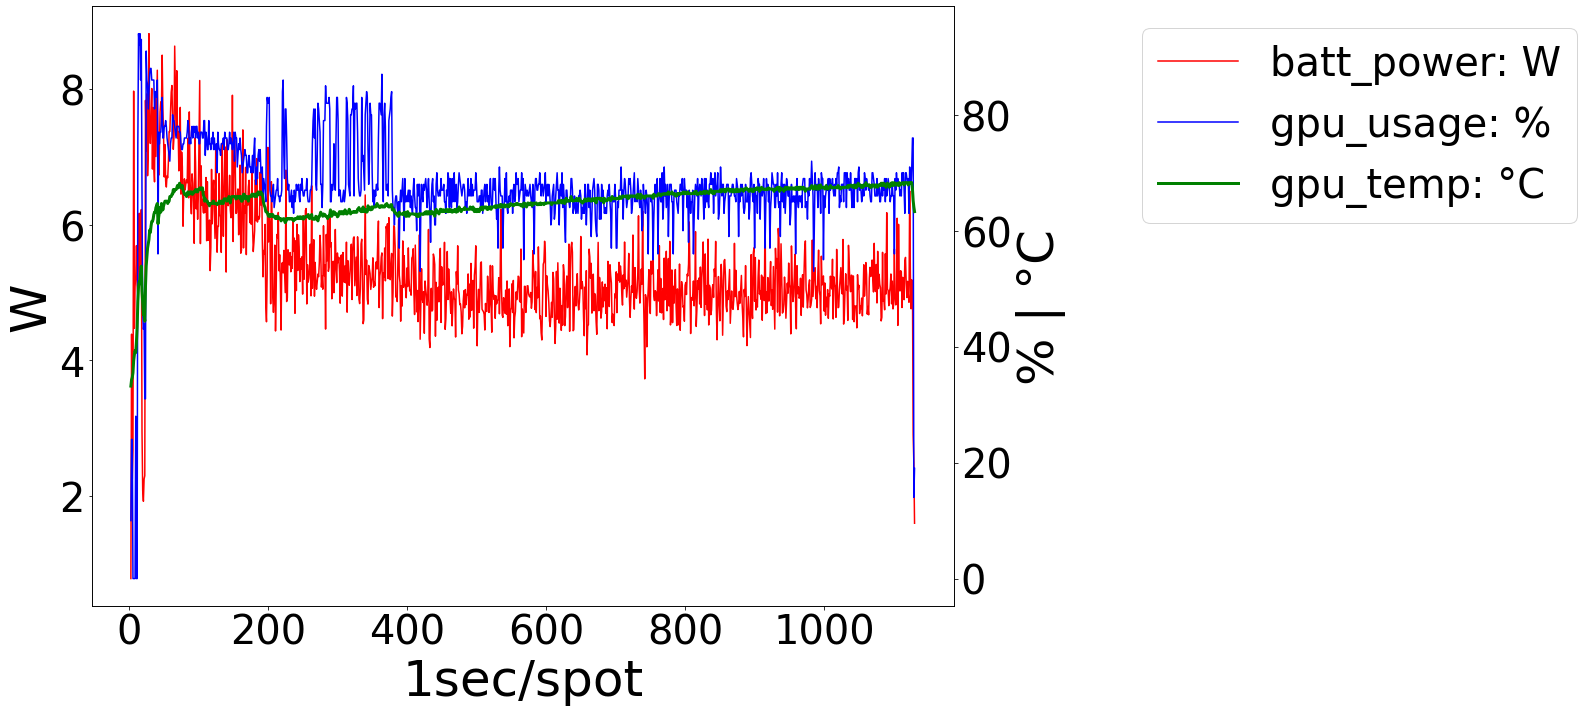

In [67]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('W', fontsize=50)

ax1.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('% | °C', fontsize=50)
ax2.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
ax2.plot(X['gpu_temp'], color='green', label = 'gpu_temp: °C', linewidth=3)


fig.legend(bbox_to_anchor=(1.46,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Battery Power VS GPU', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

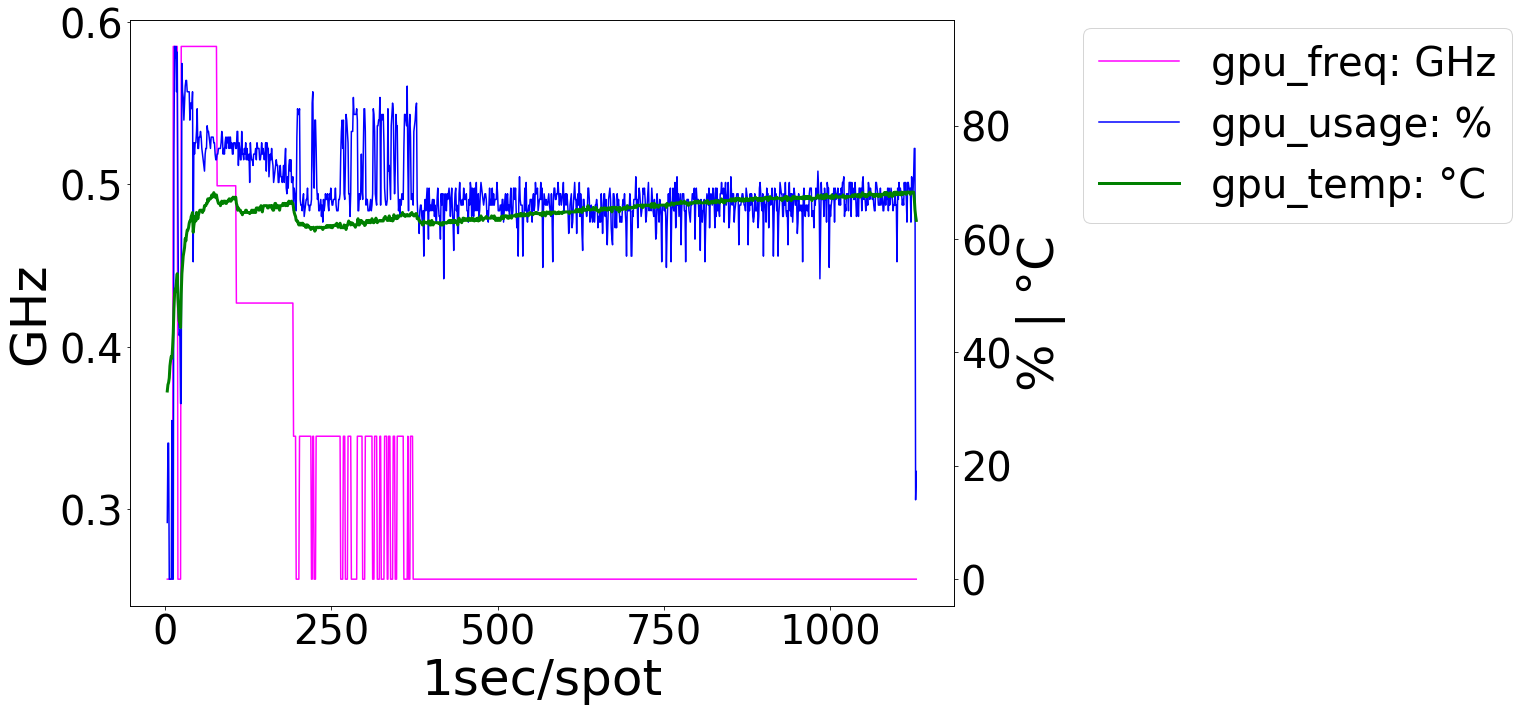

In [71]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('GHz', fontsize=50)

ax1.plot(X['gpu_freq']/1000000000, color='fuchsia', label = 'gpu_freq: GHz')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('% | °C', fontsize=50)
ax2.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
ax2.plot(X['gpu_temp'], color='green', label = 'gpu_temp: °C', linewidth=3)


fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('GPU', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

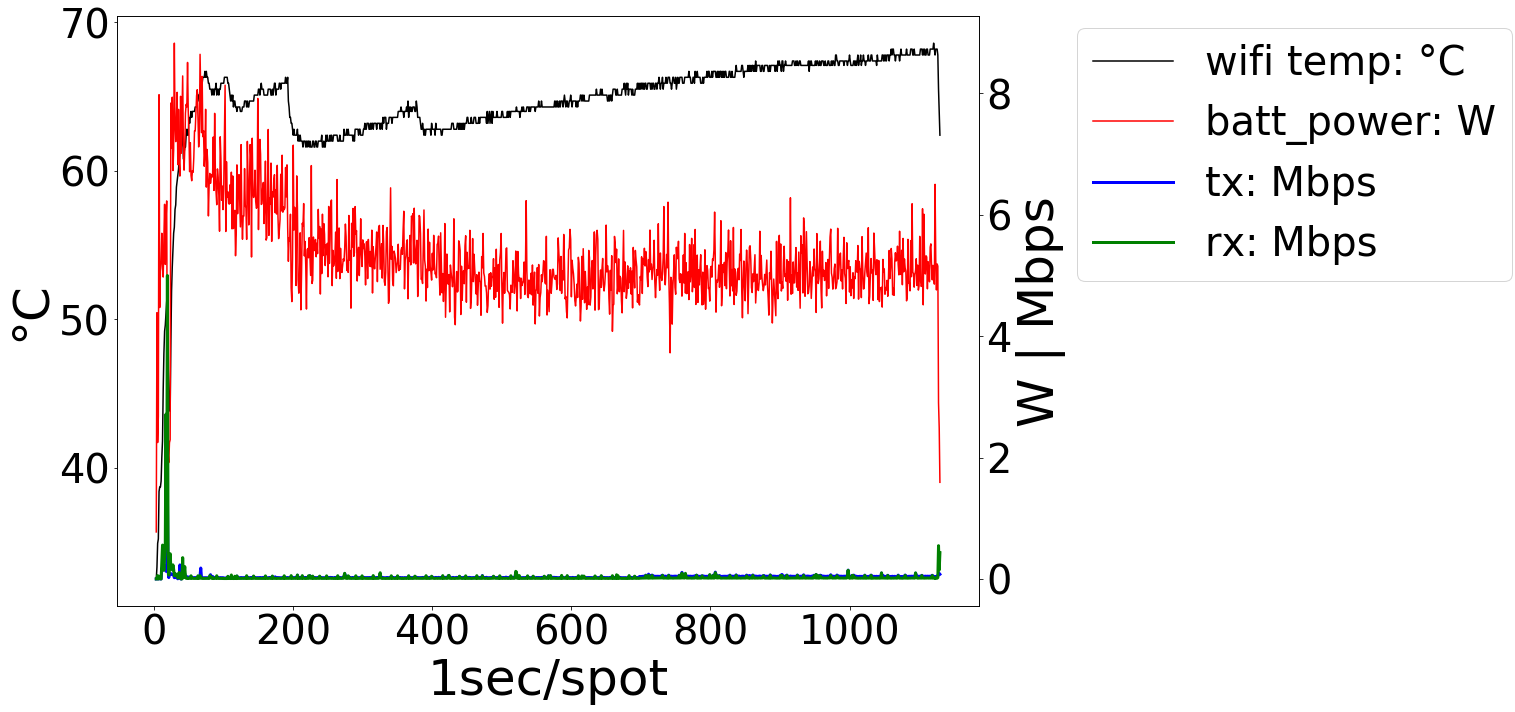

In [73]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)

ax1.plot(X['cwlan-usr']/1000, color='black', label = 'wifi temp: °C')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('W | Mbps', fontsize=50)
ax2.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax2.plot(X['tx'] * 8 /1000, color='blue', label = 'tx: Mbps', linewidth=3)
ax2.plot(X['rx'] * 8 /1000, color='green', label = 'rx: Mbps', linewidth=3)


fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Power Temperature VS Wi-Fi', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

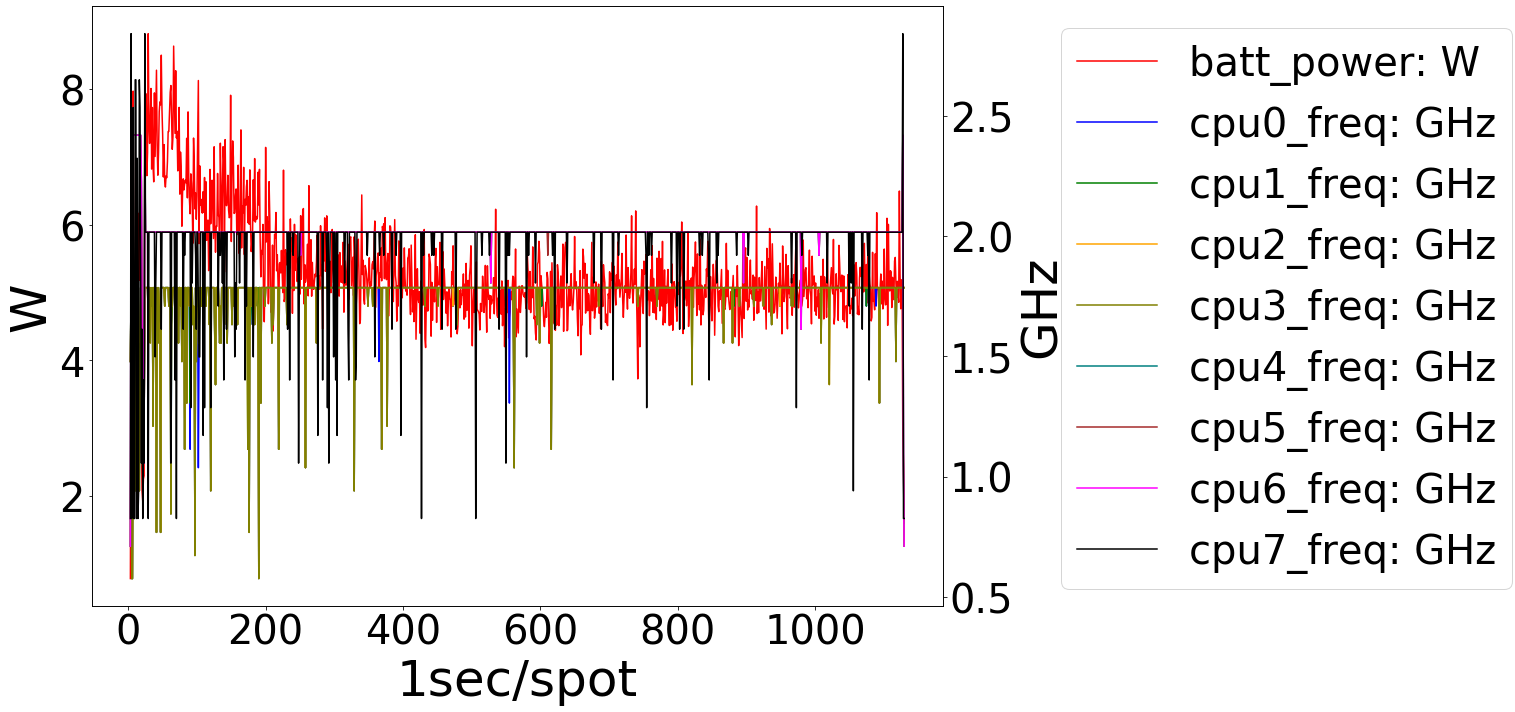

In [74]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('W', fontsize=50)

ax1.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('GHz', fontsize=50)
ax2.plot(X['f_cpu0']/1000000, color='blue', label = 'cpu0_freq: GHz')
ax2.plot(X['f_cpu1']/1000000, color='green', label = 'cpu1_freq: GHz')
ax2.plot(X['f_cpu2']/1000000, color='orange', label = 'cpu2_freq: GHz')
ax2.plot(X['f_cpu3']/1000000, color='olive', label = 'cpu3_freq: GHz')
ax2.plot(X['f_cpu4']/1000000, color='teal', label = 'cpu4_freq: GHz')
ax2.plot(X['f_cpu5']/1000000, color='brown', label = 'cpu5_freq: GHz')
ax2.plot(X['f_cpu6']/1000000, color='fuchsia', label = 'cpu6_freq: GHz')
ax2.plot(X['f_cpu7']/1000000, color='black', label = 'cpu7_freq: GHz')



fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Power VS CPU Frequency', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

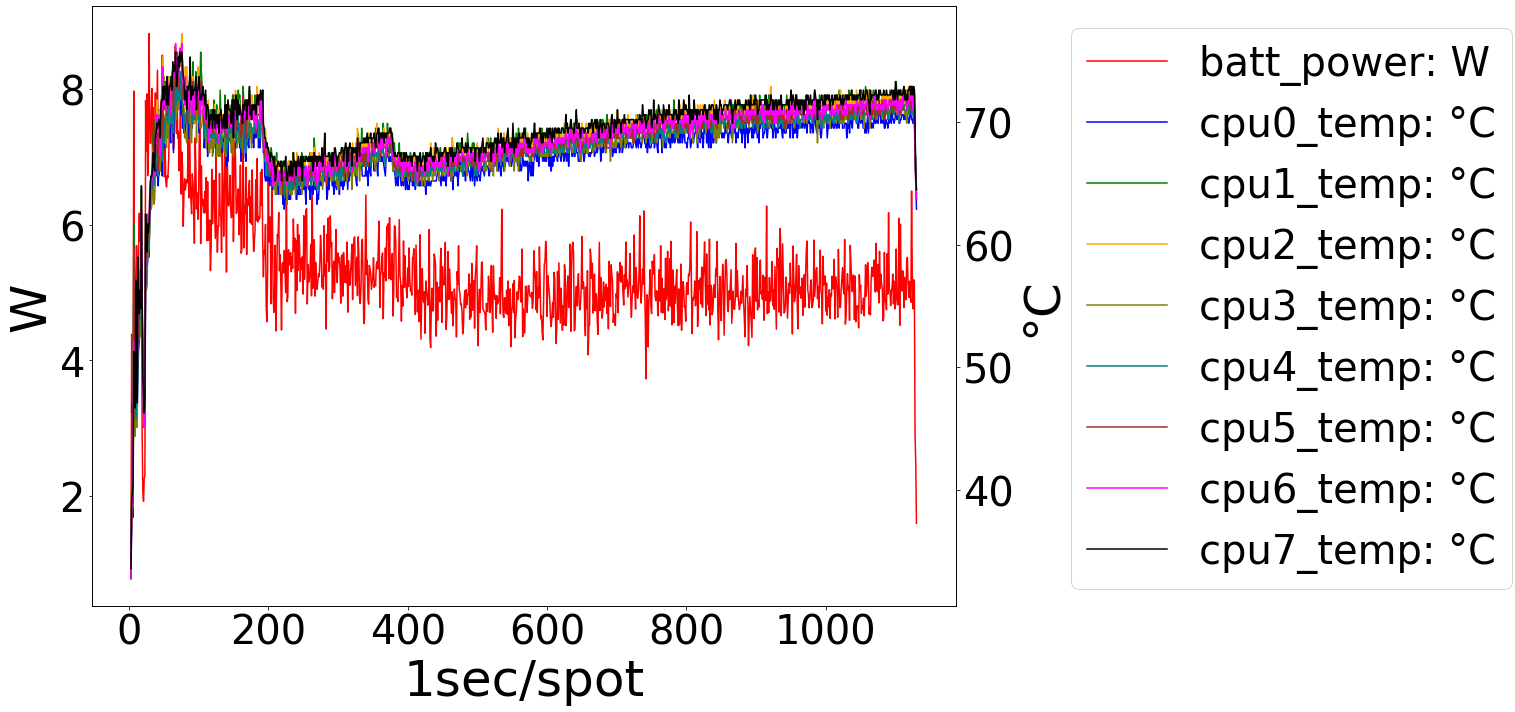

In [76]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('W', fontsize=50)

ax1.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('°C', fontsize=50)
ax2.plot(X['cpu-1-0-usr']/1000, color='blue', label = 'cpu0_temp: °C')
ax2.plot(X['cpu-1-1-usr']/1000, color='green', label = 'cpu1_temp: °C')
ax2.plot(X['cpu-1-2-usr']/1000, color='orange', label = 'cpu2_temp: °C')
ax2.plot(X['cpu-1-3-usr']/1000, color='olive', label = 'cpu3_temp: °C')
ax2.plot(X['cpu-1-4-usr']/1000, color='teal', label = 'cpu4_temp: °C')
ax2.plot(X['cpu-1-5-usr']/1000, color='brown', label = 'cpu5_temp: °C')
ax2.plot(X['cpu-1-6-usr']/1000, color='fuchsia', label = 'cpu6_temp: °C')
ax2.plot(X['cpu-1-7-usr']/1000, color='black', label = 'cpu7_temp: °C')

fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Power VS CPU Temperature', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

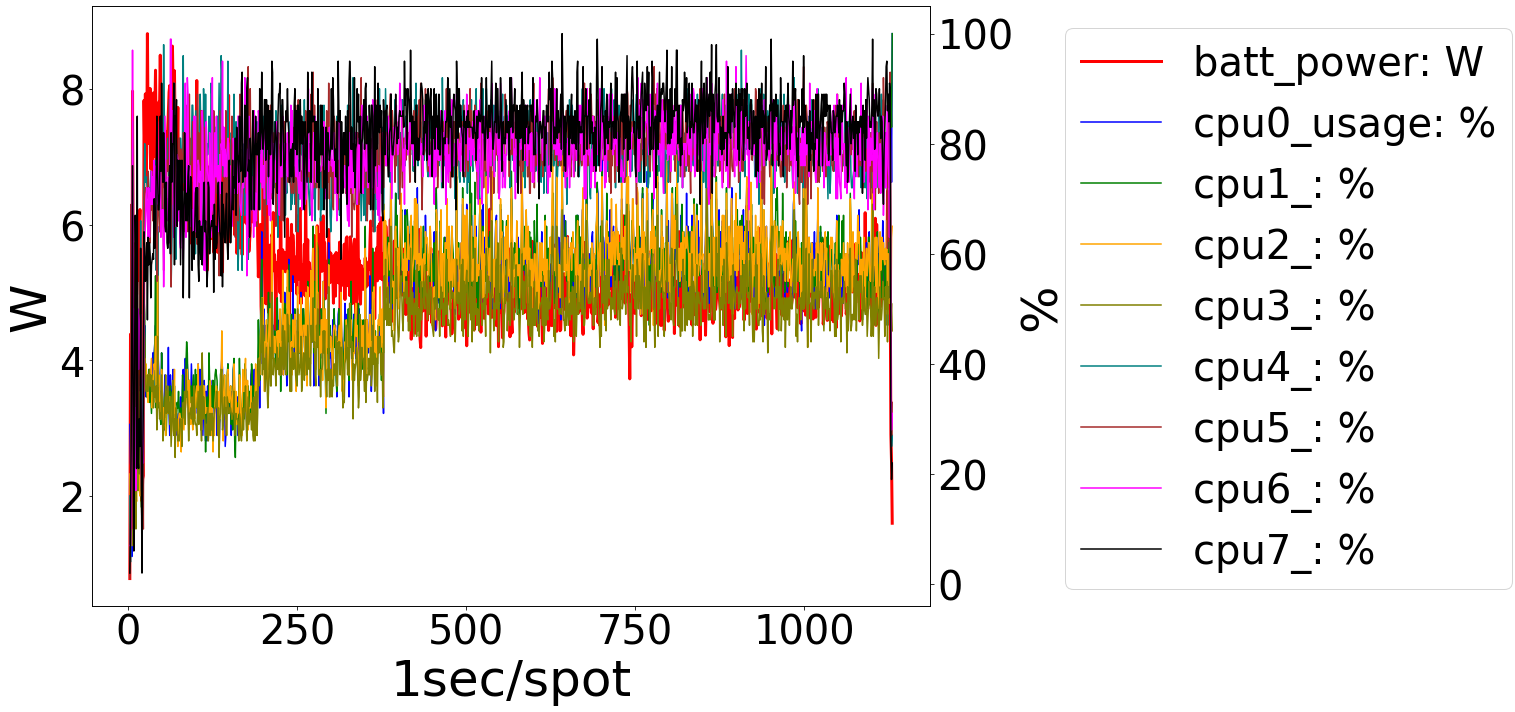

In [77]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('W', fontsize=50)

ax1.plot(X['bat_power']/1000, color='red', label = 'batt_power: W', linewidth=3)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('%', fontsize=50)
ax2.plot(100 - X['cpuIdle0'], color='blue', label = 'cpu0_usage: %')
ax2.plot(100 - X['cpuIdle1'], color='green', label = 'cpu1_: %')
ax2.plot(100 - X['cpuIdle2'], color='orange', label = 'cpu2_: %')
ax2.plot(100 - X['cpuIdle3'], color='olive', label = 'cpu3_: %')
ax2.plot(100 - X['cpuIdle4'], color='teal', label = 'cpu4_: %')
ax2.plot(100 - X['cpuIdle5'], color='brown', label = 'cpu5_: %')
ax2.plot(100 - X['cpuIdle6'], color='fuchsia', label = 'cpu6_: %')
ax2.plot(100 - X['cpuIdle7'], color='black', label = 'cpu7_: %')

fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Power VS CPU Usage', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

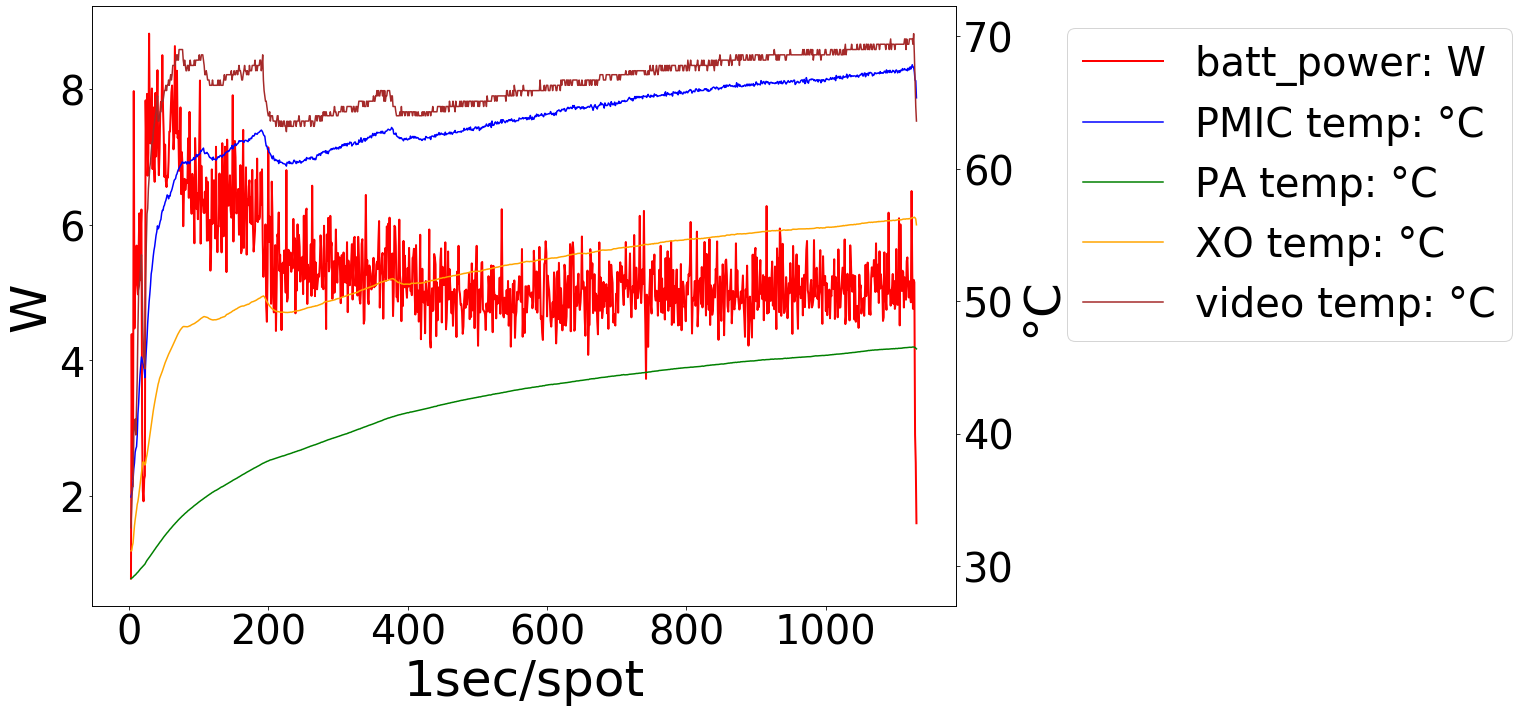

In [79]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('1sec/spot', fontsize=50)
ax1.set_ylabel('W', fontsize=50)
ax1.plot(X['bat_power']/1000, color='red', label = 'batt_power: W', linewidth=2)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('°C', fontsize=50)


ax2.plot(X['pm8150l_tz']/1000, color='blue', label = 'PMIC temp: °C')
ax2.plot(X['pa-therm']/1000, color='green', label = 'PA temp: °C')
ax2.plot(X['xo-therm']/1000, color='orange', label = 'XO temp: °C')
ax2.plot(X['video-usr']/1000, color='brown', label = 'video temp: °C')

fig.legend(bbox_to_anchor=(1.4,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Power VS Other Temerature', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()